In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from numpy import savetxt,loadtxt

In [2]:
df_ratings = pd.read_csv("ratings.csv")

In [4]:
df_ratings.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [3]:
userId = df_ratings["userId"]
movieId = df_ratings["movieId"]
rating = df_ratings["rating"]

In [6]:
# Checking nulls
print(df_ratings.isnull().values.any())

False


In [4]:
ratings_matrix = df_ratings.pivot_table("rating", "userId", "movieId")
ratings_matrix_bool = ratings_matrix >= 0

In [5]:
(user_size,movie_size) = ratings_matrix.shape

In [6]:
available_ratings_size = rating.shape[0]
possible_ratings_size = user_size * movie_size

In [10]:
#Question 1-A
sparsity = available_ratings_size/possible_ratings_size
print("Sparsity of the movie rating dataset: ", sparsity)

Sparsity of the movie rating dataset:  0.016999683055613623


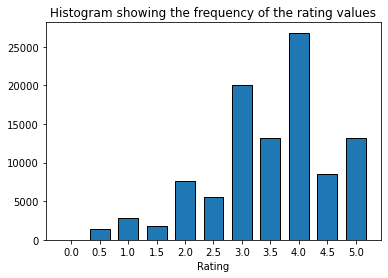

In [11]:
#Question 1-B
n, bins, _ =plt.hist(rating, bins = np.arange(0,5.51,0.5),edgecolor = 'Black', align='left',rwidth=0.7)
plt.xticks(np.arange(0,5.01, step = 0.5))
plt.xlabel("Rating")
plt.title("Histogram showing the frequency of the rating values")
plt.show()

In [12]:
#Question 1-C
movieFreq = np.sort(np.sum(ratings_matrix_bool , axis = 0))[::-1]

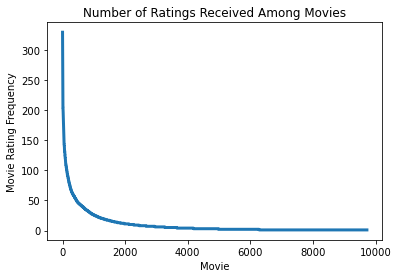

In [13]:
plt.figure()
plt.plot(movieFreq,linewidth = 3)
plt.ylabel("Movie Rating Frequency")
plt.xlabel("Movie")
plt.title("Number of Ratings Received Among Movies")
plt.show()

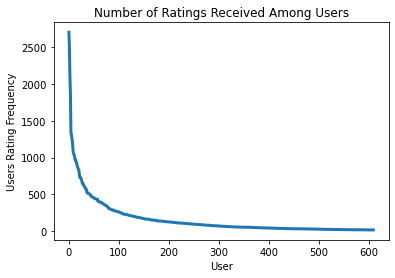

In [14]:
#Question 1-D
userFreq = np.sort(np.sum(ratings_matrix_bool , axis = 1))[::-1]

plt.plot(userFreq,linewidth = 3)
plt.ylabel("Users Rating Frequency")
plt.xlabel("User")
plt.title("Number of Ratings Received Among Users")
plt.show()

In [15]:
#Question 1-E
#Discussion no code

In [16]:
#Question 1-F
variance_each_movie = np.var(ratings_matrix, axis = 0)

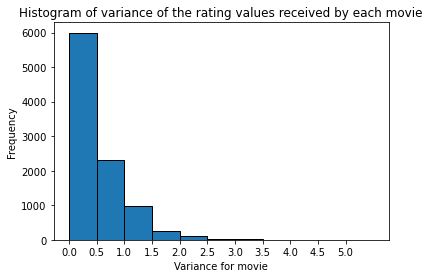

In [17]:
#plot variance for each movie in a histogram
plt.hist(variance_each_movie,bins = np.arange(0,max(variance_each_movie)+0.501,0.5),edgecolor = 'Black', align='mid')
plt.xticks(np.arange(0,5.01, step = 0.5))
plt.xlabel("Variance for movie")
plt.ylabel("Frequency")
plt.title("Histogram of variance of the rating values received by each movie")
plt.show()

In [18]:
#Question 2-A
#Write formula

In [19]:
#Question 2-B
#Explain

In [20]:
#Question 3
#Explain

In [7]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans

In [8]:
#read dataset using surprise
reader = Reader(rating_scale = (0.5,5)) # we have halves also
df_ratings_surprise = Dataset.load_from_df(df_ratings[["userId","movieId","rating"]],reader)

In [23]:
#DO CV k = 10
#Question 4

mae_k = []
rmse_k = []
for k in range(2,102,2): 
    knn_colab_filter = KNNWithMeans(k = k, sim_options = {'name': 'pearson'},verbose = False)
    fold_result = cross_validate(knn_colab_filter, df_ratings_surprise, measures =['RMSE','MAE'], cv = 10, n_jobs = -1)
    print("Evaluated k = ", k)
    rmse_k.append(np.mean(fold_result['test_rmse']))
    mae_k.append(np.mean(fold_result['test_mae']))
    

savetxt('rmse.csv', rmse_k, delimiter=',')
savetxt('mae.csv',mae_k, delimiter =',')


Evaluated k =  2
Evaluated k =  4
Evaluated k =  6
Evaluated k =  8
Evaluated k =  10
Evaluated k =  12
Evaluated k =  14
Evaluated k =  16
Evaluated k =  18
Evaluated k =  20
Evaluated k =  22
Evaluated k =  24
Evaluated k =  26
Evaluated k =  28
Evaluated k =  30
Evaluated k =  32
Evaluated k =  34
Evaluated k =  36
Evaluated k =  38
Evaluated k =  40
Evaluated k =  42
Evaluated k =  44
Evaluated k =  46
Evaluated k =  48
Evaluated k =  50
Evaluated k =  52
Evaluated k =  54
Evaluated k =  56
Evaluated k =  58
Evaluated k =  60
Evaluated k =  62
Evaluated k =  64
Evaluated k =  66
Evaluated k =  68
Evaluated k =  70
Evaluated k =  72
Evaluated k =  74
Evaluated k =  76
Evaluated k =  78
Evaluated k =  80
Evaluated k =  82
Evaluated k =  84
Evaluated k =  86
Evaluated k =  88
Evaluated k =  90
Evaluated k =  92
Evaluated k =  94
Evaluated k =  96
Evaluated k =  98
Evaluated k =  100


In [24]:
from numpy import loadtxt
rmse_k = loadtxt('rmse.csv', delimiter=',')
mae_k = loadtxt('mae.csv', delimiter =',')

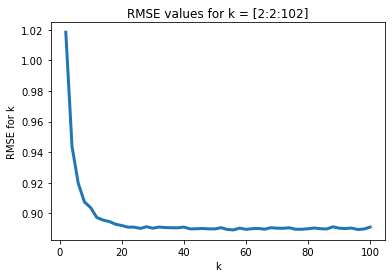

In [25]:
#Question 5
k_list = np.arange(2,102,2)
plt.plot(k_list,rmse_k,linewidth = 3)
plt.ylabel("RMSE for k")
plt.xlabel("k")
plt.title("RMSE values for k = [2:2:102]")
plt.show()

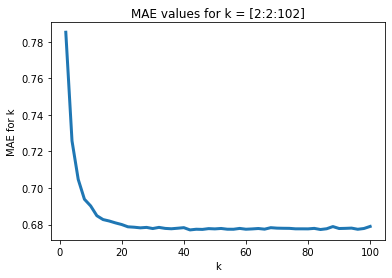

In [26]:
#Question 5
plt.plot(k_list,mae_k,linewidth = 3)
plt.ylabel("MAE for k")
plt.xlabel("k")
plt.title("MAE values for k = [2:2:102]")
plt.show()

In [27]:
#Question 5
#HERE USELESS, FIND STEADY STATE 15-30, 
best_idx_rmse_k = np.argmin(rmse_k)
best_idx_mae_k = np.argmin(mae_k)
best_rmse_k = k_list[best_idx_rmse_k]
best_mae_k = k_list[best_idx_mae_k]
print("Best MAE is ",mae_k[best_idx_mae_k]," with k = ", best_mae_k)
print("Best RMSE is ",rmse_k[best_idx_rmse_k]," with k = ", best_rmse_k)
print("Steady State MAE is ",mae_k[14]," with k = ", 30)  
print("Steady State RMSE is ",rmse_k[14]," with k = ", 30) 

Best MAE is  0.6770953878954101  with k =  42
Best RMSE is  0.8892632384652435  with k =  56
Steady State MAE is  0.6778463839665577  with k =  30
Steady State RMSE is  0.8903526820676578  with k =  30


In [9]:
#Question 6
def popular_movie_trimming(df_ratings):
    
    ratings_matrix_bool = df_ratings.pivot_table("rating", "userId", "movieId") >= 0 # map to hasRated or notRated
    movie_freq = np.sum(ratings_matrix_bool, axis = 0) #sum number of rates for each movie
    selected_movieId = movie_freq.keys()[np.where(movie_freq > 2)] # get movieIds that  has greater than 2 ratings
    df_trimmed = df_ratings.loc[df_ratings['movieId'].isin(selected_movieId)]
    
    return df_trimmed

def unpopular_movie_trimming(df_ratings):
    
    ratings_matrix_bool = df_ratings.pivot_table("rating", "userId", "movieId") >= 0 # map to hasRated or notRated
    movie_freq = np.sum(ratings_matrix_bool, axis = 0) #sum number of rates for each movie
    selected_movieId = movie_freq.keys()[np.where(movie_freq <= 2)] # get movieIds that  has less than or equal to 2 ratings
    df_trimmed = df_ratings.loc[df_ratings['movieId'].isin(selected_movieId)]
    
    return df_trimmed

def high_variance_movie_trimming(df_ratings):
    
    ratings_matrix = df_ratings.pivot_table("rating", "userId", "movieId")  
    ratings_matrix_bool = ratings_matrix >= 0
    movie_freq = np.sum(ratings_matrix_bool, axis = 0) #sum number of rates for each movie
    selected_movieId = movie_freq.keys()[np.where(movie_freq >= 5)] # get movieIds that  has greater than or equal to 5 ratings
    df_trimmed_1 = df_ratings.loc[df_ratings['movieId'].isin(selected_movieId)]
    
    ratings_matrix2 = df_trimmed_1.pivot_table("rating", "userId", "movieId")
    variance_each_movie = np.var(ratings_matrix2, axis = 0)
    selected_movieId = variance_each_movie.keys()[np.where(variance_each_movie >= 2)] # get movieIds that  has greater than or equal to 2 variance
    df_trimmed = df_trimmed_1.loc[df_trimmed_1['movieId'].isin(selected_movieId)]
    return df_trimmed

In [10]:
# First popular_movie
df_ratings_popular = popular_movie_trimming(df_ratings)
df_ratings_unpopular = unpopular_movie_trimming(df_ratings)
df_ratings_high_var = high_variance_movie_trimming(df_ratings)

In [30]:
df_ratings_popular.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [31]:
df_ratings_unpopular.head()

,Unnamed: 0,userId,movieId,rating,timestamp
11,11,414,1040,3.0,965067631
14,14,474,3125,4.0,1014924099
19,19,606,32862,4.0,1171813113
21,21,606,6789,4.0,1171375616
35,35,610,71910,2.5,1493848618


In [32]:
df_ratings_high_var.head()

,Unnamed: 0,userId,movieId,rating,timestamp
215,215,83,7669,4.0,1332840342
920,920,564,85367,4.0,1478454021
1025,1025,318,86377,4.0,1413560299
1096,1096,232,7155,0.5,1085352933
1380,1380,294,3099,2.0,966596234


In [11]:
from surprise.model_selection import KFold
from surprise import accuracy

In [12]:
reader = Reader(rating_scale = (0.5,5)) 
df_ratings_popular_surprise = Dataset.load_from_df(df_ratings_popular[['userId','movieId','rating']], reader)

reader = Reader(rating_scale = (0.5,5))
df_ratings_unpopular_surprise = Dataset.load_from_df(df_ratings_unpopular[['userId','movieId','rating']], reader)

reader = Reader(rating_scale = (0.5,5))
df_ratings_high_var_surprise = Dataset.load_from_df(df_ratings_high_var[['userId','movieId','rating']], reader)

In [19]:

rmse_popular = []
kfold = KFold(n_splits = 10)

for k in range(2,102,2):
    model_knn = KNNWithMeans(k = k, sim_options = {"name": "pearson"},verbose = False)
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_popular_surprise):
        model_knn.fit(train_dataset)
        predictions = model_knn.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_popular.append(np.mean(rmse_fold))


k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50
k =  52
k =  54
k =  56
k =  58
k =  60
k =  62
k =  64
k =  66
k =  68
k =  70
k =  72
k =  74
k =  76
k =  78
k =  80
k =  82
k =  84
k =  86
k =  88
k =  90
k =  92
k =  94
k =  96
k =  98
k =  100


In [ ]:

rmse_unpopular = []
kfold = KFold(n_splits = 10)

for k in range(2,102,2):
    model_knn = KNNWithMeans(k = k, sim_options = {"name": "pearson"},verbose = False)
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_high_var_surprise):
        model_knn.fit(train_dataset)
        predictions = model_knn.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_unpopular.append(np.mean(rmse_fold))


k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50
k =  52
k =  54
k =  56
k =  58
k =  60
k =  62
k =  64
k =  66
k =  68
k =  70
k =  72
k =  74
k =  76
k =  78
k =  80
k =  82
k =  84
k =  86
k =  88
k =  90
k =  92
k =  94
k =  96
k =  98
k =  100


In [ ]:

rmse_high_var = []
kfold = KFold(n_splits = 10)

for k in range(2,102,2):
    model_knn = KNNWithMeans(k = k, sim_options = {"name": "pearson"},verbose = False)
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_unpopular_surprise):
        model_knn.fit(train_dataset)
        predictions = model_knn.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_high_var.append(np.mean(rmse_fold))


k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50
k =  52
k =  54
k =  56
k =  58
k =  60
k =  62
k =  64
k =  66
k =  68
k =  70
k =  72
k =  74
k =  76
k =  78
k =  80
k =  82
k =  84
k =  86
k =  88
k =  90
k =  92
k =  94
k =  96
k =  98
k =  100


In [44]:

savetxt('rmse_popular.csv',rmse_popular,delimiter=',')
savetxt('rmse_unpopular.csv', rmse_unpopular, delimiter=',')
savetxt('rmse_high_var.csv',rmse_high_var, delimiter =',')

rmse_popular = loadtxt('rmse_popular.csv',delimiter=',')
rmse_unpopular = loadtxt('rmse_unpopular.csv',delimiter=',')
rmse_high_var = loadtxt('rmse_high_var.csv',delimiter=',')

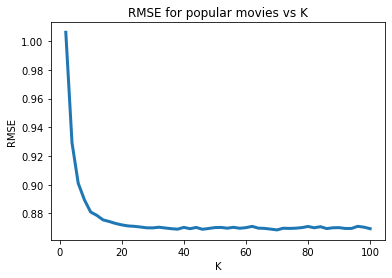

In [45]:
k_list = np.arange(2,102,2)
plt.plot(k_list,rmse_popular,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for popular movies vs K") 
plt.show()

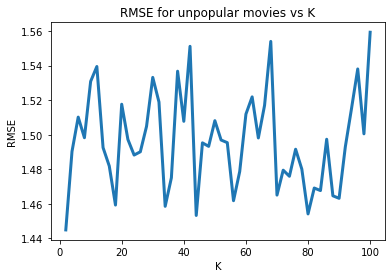

In [46]:
plt.plot(k_list,rmse_unpopular,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for unpopular movies vs K") 
plt.show()

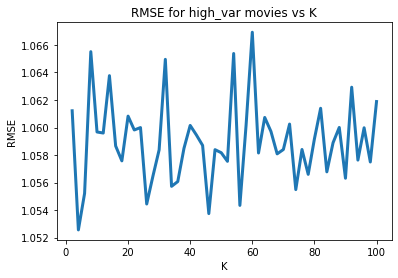

In [47]:
plt.plot(k_list,rmse_high_var,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for high_var movies vs K") 
plt.show()

In [48]:
best_k_popular = np.argmin(rmse_popular) * 2 + 2
best_k_unpopular = np.argmin(rmse_unpopular) * 2 + 2
best_k_high_var = np.argmin(rmse_high_var) * 2 + 2

In [49]:
print("Best k for popular set: ", best_k_popular, " with RMSE ", rmse_popular[np.argmin(rmse_popular)])
print("Best k for unpopular set: ", best_k_unpopular," with RMSE ", rmse_unpopular[np.argmin(rmse_unpopular)])
print("Best k for high_var set: ", best_k_high_var," with RMSE ",rmse_high_var[np.argmin(rmse_high_var)])

Best k for popular set:  70  with RMSE  0.868553345660027
Best k for unpopular set:  2  with RMSE  1.444946871565358
Best k for high_var set:  4  with RMSE  1.052559658953362


In [14]:
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
from surprise.model_selection import train_test_split




def compute_draw_roc_auc(df_ratings,k, name):
    thresholds = [2.5, 3, 3.5, 4]
    FPR_s = []
    TPR_s = []
    AUC_s = []
    for threshold in thresholds:
        model_knn = KNNWithMeans(k = k, sim_options = {'name' : 'pearson'}, verbose = False)
        train_dataset, test_dataset = train_test_split(df_ratings, test_size = 0.1)
        model_knn.fit(train_dataset)
        predictions = model_knn.test(test_dataset)
        
        y_est = []
        y_real = []
        for i in range(len(predictions)):
            if(test_dataset[i][2] >= threshold):
                y_real.append(1.0)
            else:
                y_real.append(0.0)
            y_est.append(predictions[i].est)
        
        FPR, TPR, _ = roc_curve(y_real, y_est)
        AUC = roc_auc_score(y_real, y_est)
        FPR_s.append(FPR)
        TPR_s.append(TPR)
        AUC_s.append(AUC)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ' +  name)
    for i in range(len(FPR_s)):
        plt.plot(FPR_s[i],TPR_s[i], label = 'ROC Curve: Threshold: {rt} AUC: {auc}'.format(rt=thresholds[i], auc=AUC_s[i]))
    plt.legend(loc="lower right")
    plt.show()
        
    

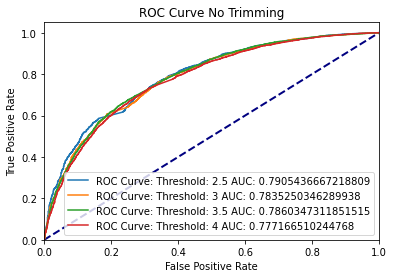

In [51]:
compute_draw_roc_auc(df_ratings_surprise,30, "No Trimming")

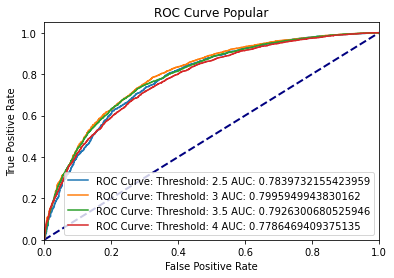

In [52]:
compute_draw_roc_auc(df_ratings_popular_surprise,best_k_popular, "Popular")

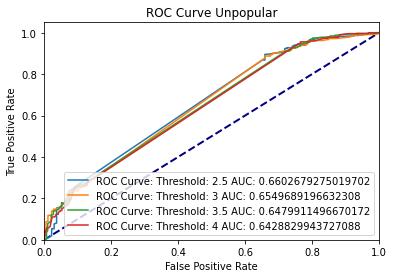

In [53]:
compute_draw_roc_auc(df_ratings_unpopular_surprise,best_k_unpopular, "Unpopular")

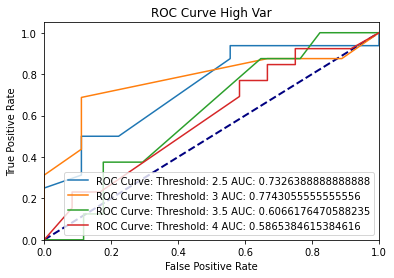

In [54]:
compute_draw_roc_auc(df_ratings_high_var_surprise,best_k_high_var, "High Var")

In [ ]:
# Question 7 - on report

In [15]:
from surprise.prediction_algorithms.matrix_factorization import NMF

In [20]:
# Question 8
#DO CV k = 10

mae_k = []
rmse_k = []
for k in range(2,52,2):
    nmf_colab_filter = NMF( n_factors = k,
                            n_epochs = 20,
                            lr_bu = 0.007,
                            lr_bi = 0.007,
                            random_state = 42, 
                            verbose = False )
    fold_result = cross_validate(   nmf_colab_filter, 
                                    df_ratings_surprise, 
                                    measures =['RMSE','MAE'], 
                                    cv = 10, 
                                    n_jobs = -1)
    print("Evaluated k = ", k)
    rmse_k.append (np.mean(fold_result['test_rmse']) )
    mae_k.append( np.mean(fold_result['test_mae']) )
    

savetxt('rmseq8.csv', rmse_k, delimiter=',')
savetxt('maeq8.csv',mae_k, delimiter =',')

Evaluated k =  2
Evaluated k =  4
Evaluated k =  6
Evaluated k =  8
Evaluated k =  10
Evaluated k =  12
Evaluated k =  14
Evaluated k =  16
Evaluated k =  18
Evaluated k =  20
Evaluated k =  22
Evaluated k =  24
Evaluated k =  26
Evaluated k =  28
Evaluated k =  30
Evaluated k =  32
Evaluated k =  34
Evaluated k =  36
Evaluated k =  38
Evaluated k =  40
Evaluated k =  42
Evaluated k =  44
Evaluated k =  46
Evaluated k =  48
Evaluated k =  50


In [17]:
rmse_k = loadtxt('rmseq8.csv', delimiter=',')
mae_k = loadtxt('maeq8.csv', delimiter =',')

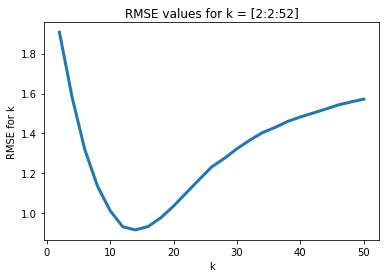

In [58]:
k_list = np.arange(2,52,2)
plt.plot(k_list,rmse_k,linewidth = 3)
plt.ylabel("RMSE for k")
plt.xlabel("k")
plt.title("RMSE values for k = [2:2:52]")
plt.show()

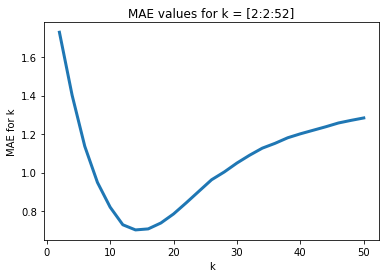

In [59]:
plt.plot(k_list,mae_k,linewidth = 3)
plt.ylabel("MAE for k")
plt.xlabel("k")
plt.title("MAE values for k = [2:2:52]")
plt.show()

In [60]:
best_idx_rmse_k = np.argmin(rmse_k)
best_idx_mae_k = np.argmin(mae_k)
best_rmse_k = k_list[best_idx_rmse_k]
best_mae_k = k_list[best_idx_mae_k]
print("Best MAE is ",mae_k[best_idx_mae_k]," with k = ", best_mae_k)
print("Best RMSE is ",rmse_k[best_idx_rmse_k]," with k = ", best_rmse_k)

Best MAE is  0.7024346519828633  with k =  14
Best RMSE is  0.9169036805496873  with k =  14


In [61]:
rmse_popular = []
kfold = KFold(n_splits = 10)

for k in range(2,52,2):
    model_nmf = NMF( n_factors = k,
                     n_epochs = 20,
                     lr_bu = 0.007,
                     lr_bi = 0.007,
                     random_state = 42, 
                     verbose = False )
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_popular_surprise):
        model_nmf.fit(train_dataset)
        predictions = model_nmf.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_popular.append(np.mean(rmse_fold))

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50


In [62]:
rmse_unpopular = []
kfold = KFold(n_splits = 10)

for k in range(2,52,2):
    model_nmf = NMF( n_factors = k,
                     n_epochs = 20,
                     lr_bu = 0.007,
                     lr_bi = 0.007,
                     random_state = 42, 
                     verbose = False )
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_high_var_surprise):
        model_nmf.fit(train_dataset)
        predictions = model_nmf.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_unpopular.append(np.mean(rmse_fold))

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50


In [63]:
rmse_high_var = []
kfold = KFold(n_splits = 10)

for k in range(2,52,2):
    model_nmf = NMF( n_factors = k,
                     n_epochs = 20,
                     lr_bu = 0.007,
                     lr_bi = 0.007,
                     random_state = 42, 
                     verbose = False )
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_unpopular_surprise):
        model_nmf.fit(train_dataset)
        predictions = model_nmf.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_high_var.append(np.mean(rmse_fold))

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50


In [24]:

savetxt('rmse_popularq8.csv',rmse_popular,delimiter=',')
savetxt('rmse_unpopularq8.csv', rmse_unpopular, delimiter=',')
savetxt('rmse_high_varq8.csv',rmse_high_var, delimiter =',')

rmse_popular = loadtxt('rmse_popularq8.csv',delimiter=',')
rmse_unpopular = loadtxt('rmse_unpopularq8.csv',delimiter=',')
rmse_high_var = loadtxt('rmse_high_varq8.csv',delimiter=',')

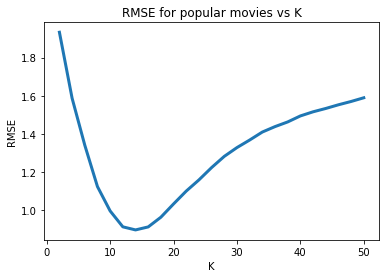

In [65]:
k_list = np.arange(2,52,2)
plt.plot(k_list,rmse_popular,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for popular movies vs K") 
plt.show()

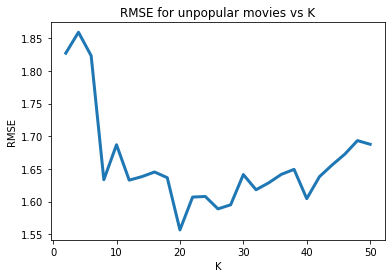

In [66]:
plt.plot(k_list,rmse_unpopular,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for unpopular movies vs K") 
plt.show()

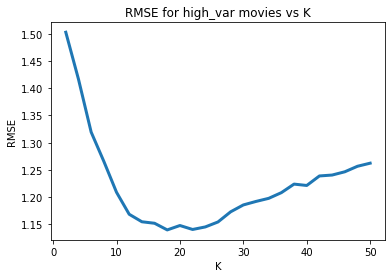

In [67]:
plt.plot(k_list,rmse_high_var,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for high_var movies vs K") 
plt.show()

In [25]:
best_k_popular = np.argmin(rmse_popular) * 2 + 2
best_k_unpopular = np.argmin(rmse_unpopular) * 2 + 2
best_k_high_var = np.argmin(rmse_high_var) * 2 + 2
print("Best k for popular set: ", best_k_popular, " with RMSE ", rmse_popular[np.argmin(rmse_popular)])
print("Best k for unpopular set: ", best_k_unpopular," with RMSE ", rmse_unpopular[np.argmin(rmse_unpopular)])
print("Best k for high_var set: ", best_k_high_var," with RMSE ",rmse_high_var[np.argmin(rmse_high_var)])

Best k for popular set:  28  with RMSE  0.851021301730046
Best k for unpopular set:  34  with RMSE  1.5492344655454628
Best k for high_var set:  12  with RMSE  0.8913524264406613


In [26]:
def compute_draw_roc_auc_nmf(df_ratings,k, name):
    thresholds = [2.5, 3, 3.5, 4]
    FPR_s = []
    TPR_s = []
    AUC_s = []
    for threshold in thresholds:
        model_nmf = NMF( n_factors = k,
                        n_epochs = 20,
                        lr_bu = 0.007,
                        lr_bi = 0.007,
                        random_state = 42, 
                        verbose = False )
        train_dataset, test_dataset = train_test_split(df_ratings, test_size = 0.1)
        model_nmf.fit(train_dataset)
        predictions = model_nmf.test(test_dataset)
        
        y_est = []
        y_real = []
        for i in range(len(predictions)):
            if(test_dataset[i][2] >= threshold):
                y_real.append(1.0)
            else:
                y_real.append(0.0)
            y_est.append(predictions[i].est)
        
        FPR, TPR, _ = roc_curve(y_real, y_est)
        AUC = roc_auc_score(y_real, y_est)
        FPR_s.append(FPR)
        TPR_s.append(TPR)
        AUC_s.append(AUC)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ' +  name)
    for i in range(len(FPR_s)):
        plt.plot(FPR_s[i],TPR_s[i], label = 'ROC Curve: Threshold: {rt} AUC: {auc}'.format(rt=thresholds[i], auc=AUC_s[i]))
    plt.legend(loc="lower right")
    plt.show()

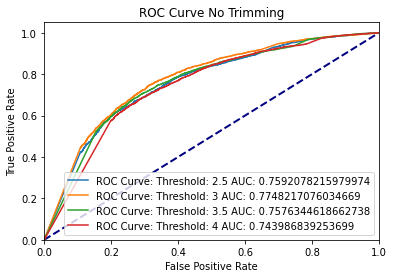

In [27]:
compute_draw_roc_auc_nmf(df_ratings_surprise,30, "No Trimming")

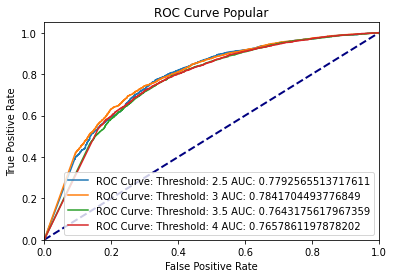

In [28]:
compute_draw_roc_auc_nmf(df_ratings_popular_surprise,best_k_popular, "Popular")

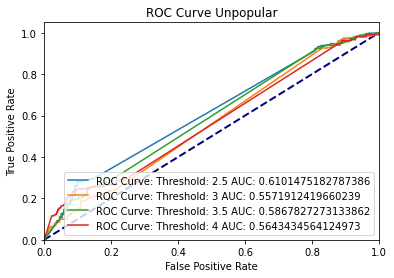

In [29]:
compute_draw_roc_auc_nmf(df_ratings_unpopular_surprise,best_k_unpopular, "Unpopular")

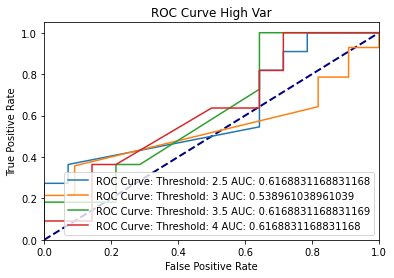

In [30]:
compute_draw_roc_auc_nmf(df_ratings_high_var_surprise,best_k_high_var, "High Var")

In [74]:
# Question 9
train_dataset, test_dataset = train_test_split(df_ratings_surprise, test_size=.1)
df_movies = pd.read_csv(   'movies.csv',
                    names=['movieid','title','genres'],
                    header=0 )
model_nmf = NMF( n_factors = 20,
                n_epochs = 20,
                lr_bu = 0.007,
                lr_bi = 0.007,
                random_state = 42, 
                verbose = False )
model_nmf.fit(train_dataset).test(test_dataset)
item_factors_v = model_nmf.qi # item factors

In [75]:
for i in range(0,20,4):
    sorted_movies = list(enumerate(item_factors_v[:,i]))
    sorted_movies.sort( key = lambda x:x[1], 
                            reverse=True)
    print(f'**Latent factor index: {i+1}**')
    for i in range(10):
        mov_id, _ = sorted_movies[i][0], sorted_movies[i][1]
        print(df_movies['genres'][mov_id])
    print('\n\n')

**Latent factor index: 1**
Animation|Children|Comedy
Action|Adventure|Drama|War
Drama|Sci-Fi|War
Comedy|Drama
Adventure|Drama|Romance
Action|Sci-Fi
Comedy
Crime|Horror|Thriller
Comedy
Action|Crime|Thriller



**Latent factor index: 5**
Adventure|Children|Sci-Fi
Comedy|Drama
Comedy
Drama
Drama
Documentary
Drama
Comedy|Drama|Romance
Comedy|Drama|Musical
Drama|Horror|Romance|Thriller



**Latent factor index: 9**
Drama
Adventure|Drama|Romance
Action|Crime|Drama|Sci-Fi|Thriller
Comedy|Crime|Drama|Horror
Drama|Horror
Animation|Children|Fantasy|Mystery
Comedy|Drama|War
Drama|Film-Noir|Thriller
Action|Drama|Thriller
Adventure|Children|Comedy



**Latent factor index: 13**
Drama|Mystery|Thriller
Drama
Action|Crime|Drama|Thriller
Action|Crime|Thriller
Comedy|Drama
Drama|Sci-Fi
Action|Crime|Thriller
Action|Adventure|Fantasy|Sci-Fi
Drama|War
Action|Comedy|Crime|Drama



**Latent factor index: 17**
Thriller
Horror
Action|Drama
Action|Drama|Thriller
Horror|Thriller
Action|Crime|Drama|Thriller
Crime

In [104]:
genre_set = set()
for i, v in df_movies['genres'].items():
    for g in v.split('|'):
        genre_set.add(g)

In [105]:
genre_set

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [35]:
from surprise.prediction_algorithms.matrix_factorization import SVD

In [77]:
# Question 10

mae_k = []
rmse_k = []
for k in range(2,52,2):
    mf_filter = SVD( n_factors = k,
                    n_epochs = 20,
                    lr_all = 0.007,
                    random_state = 42, 
                    verbose = False )
    fold_result = cross_validate(   mf_filter, 
                                    df_ratings_surprise, 
                                    measures =['RMSE','MAE'], 
                                    cv = 10, 
                                    n_jobs = -1)
    print("Evaluated k = ", k)
    rmse_k.append (np.mean(fold_result['test_rmse']) )
    mae_k.append( np.mean(fold_result['test_mae']) )
    

savetxt('rmseq10.csv', rmse_k, delimiter=',')
savetxt('maeq10.csv',mae_k, delimiter =',')

Evaluated k =  2
Evaluated k =  4
Evaluated k =  6
Evaluated k =  8
Evaluated k =  10
Evaluated k =  12
Evaluated k =  14
Evaluated k =  16
Evaluated k =  18
Evaluated k =  20
Evaluated k =  22
Evaluated k =  24
Evaluated k =  26
Evaluated k =  28
Evaluated k =  30
Evaluated k =  32
Evaluated k =  34
Evaluated k =  36
Evaluated k =  38
Evaluated k =  40
Evaluated k =  42
Evaluated k =  44
Evaluated k =  46
Evaluated k =  48
Evaluated k =  50


In [78]:
rmse_k = loadtxt('rmseq10.csv', delimiter=',')
mae_k = loadtxt('maeq10.csv', delimiter =',')

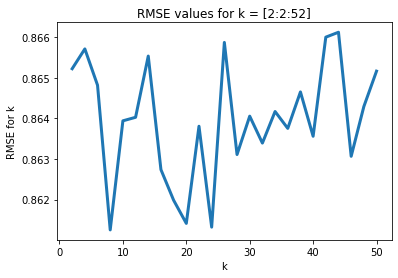

In [79]:
k_list = np.arange(2,52,2)
plt.plot(k_list,rmse_k,linewidth = 3)
plt.ylabel("RMSE for k")
plt.xlabel("k")
plt.title("RMSE values for k = [2:2:52]")
plt.show()

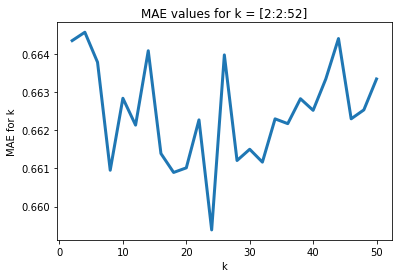

In [80]:
plt.plot(k_list,mae_k,linewidth = 3)
plt.ylabel("MAE for k")
plt.xlabel("k")
plt.title("MAE values for k = [2:2:52]")
plt.show()

In [81]:
best_idx_rmse_k = np.argmin(rmse_k)
best_idx_mae_k = np.argmin(mae_k)
best_rmse_k = k_list[best_idx_rmse_k]
best_mae_k = k_list[best_idx_mae_k]
print("Best MAE is ",mae_k[best_idx_mae_k]," with k = ", best_mae_k)
print("Best RMSE is ",rmse_k[best_idx_rmse_k]," with k = ", best_rmse_k)

Best MAE is  0.6593839181244119  with k =  24
Best RMSE is  0.8612522359034603  with k =  8


In [82]:
rmse_popular = []
kfold = KFold(n_splits = 10)

for k in range(2,52,2):
    mf_filter = SVD( n_factors = k,
                    n_epochs = 20,
                    lr_all = 0.007,
                    random_state = 42, 
                    verbose = False )
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_popular_surprise):
        mf_filter.fit(train_dataset)
        predictions = mf_filter.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_popular.append(np.mean(rmse_fold))

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50


In [83]:
rmse_unpopular = []
kfold = KFold(n_splits = 10)

for k in range(2,52,2):
    mf_filter = SVD( n_factors = k,
                    n_epochs = 20,
                    lr_all = 0.007,
                    random_state = 42, 
                    verbose = False )
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_high_var_surprise):
        mf_filter.fit(train_dataset)
        predictions = mf_filter.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_unpopular.append(np.mean(rmse_fold))

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50


In [84]:
rmse_high_var = []
kfold = KFold(n_splits = 10)

for k in range(2,52,2):
    mf_filter = SVD( n_factors = k,
                    n_epochs = 20,
                    lr_all = 0.007,
                    random_state = 42, 
                    verbose = False )
    rmse_fold = []
    for train_dataset,test_dataset in kfold.split(df_ratings_unpopular_surprise):
        mf_filter.fit(train_dataset)
        predictions = mf_filter.test(test_dataset)
        rmse_fold.append(accuracy.rmse(predictions,verbose = False))
    print("k = ", k)
    rmse_high_var.append(np.mean(rmse_fold))

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36
k =  38
k =  40
k =  42
k =  44
k =  46
k =  48
k =  50


In [31]:

savetxt('rmse_popularq8.csv',rmse_popular,delimiter=',')
savetxt('rmse_unpopularq8.csv', rmse_unpopular, delimiter=',')
savetxt('rmse_high_varq8.csv',rmse_high_var, delimiter =',')

rmse_popular = loadtxt('rmse_popularq8.csv',delimiter=',')
rmse_unpopular = loadtxt('rmse_unpopularq8.csv',delimiter=',')
rmse_high_var = loadtxt('rmse_high_varq8.csv',delimiter=',')

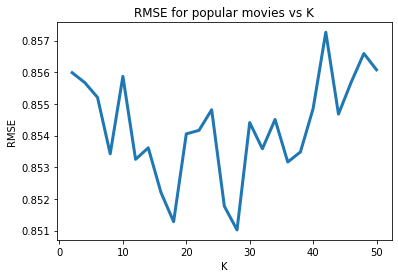

In [86]:
k_list = np.arange(2,52,2)
plt.plot(k_list,rmse_popular,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for popular movies vs K") 
plt.show()

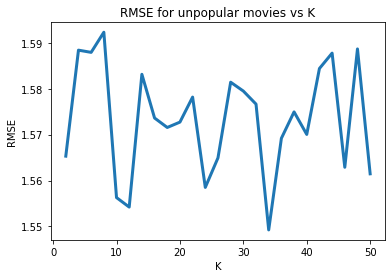

In [87]:
plt.plot(k_list,rmse_unpopular,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for unpopular movies vs K") 
plt.show()

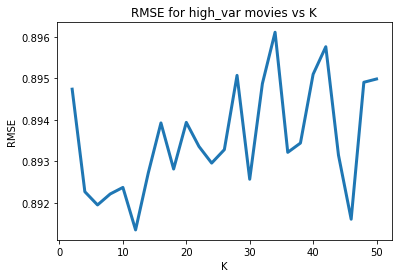

In [88]:
plt.plot(k_list,rmse_high_var,linewidth = 3)
plt.xlabel("K")
plt.ylabel("RMSE")   
plt.title("RMSE for high_var movies vs K") 
plt.show()

In [32]:
best_k_popular = np.argmin(rmse_popular) * 2 + 2
best_k_unpopular = np.argmin(rmse_unpopular) * 2 + 2
best_k_high_var = np.argmin(rmse_high_var) * 2 + 2
print("Best k for popular set: ", best_k_popular, " with RMSE ", rmse_popular[np.argmin(rmse_popular)])
print("Best k for unpopular set: ", best_k_unpopular," with RMSE ", rmse_unpopular[np.argmin(rmse_unpopular)])
print("Best k for high_var set: ", best_k_high_var," with RMSE ",rmse_high_var[np.argmin(rmse_high_var)])

Best k for popular set:  28  with RMSE  0.851021301730046
Best k for unpopular set:  34  with RMSE  1.5492344655454628
Best k for high_var set:  12  with RMSE  0.8913524264406613


In [33]:
def compute_draw_roc_auc_svd(df_ratings,k, name):
    thresholds = [2.5, 3, 3.5, 4]
    FPR_s = []
    TPR_s = []
    AUC_s = []
    for threshold in thresholds:
        mf_filter = SVD( n_factors = k,
                        n_epochs = 20,
                        lr_all = 0.007,
                        random_state = 42, 
                        verbose = False )
        train_dataset, test_dataset = train_test_split(df_ratings, test_size = 0.1)
        mf_filter.fit(train_dataset)
        predictions = mf_filter.test(test_dataset)
        
        y_est = []
        y_real = []
        for i in range(len(predictions)):
            if(test_dataset[i][2] >= threshold):
                y_real.append(1.0)
            else:
                y_real.append(0.0)
            y_est.append(predictions[i].est)
        
        FPR, TPR, _ = roc_curve(y_real, y_est)
        AUC = roc_auc_score(y_real, y_est)
        FPR_s.append(FPR)
        TPR_s.append(TPR)
        AUC_s.append(AUC)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ' +  name)
    for i in range(len(FPR_s)):
        plt.plot(FPR_s[i],TPR_s[i], label = 'ROC Curve: Threshold: {rt} AUC: {auc}'.format(rt=thresholds[i], auc=AUC_s[i]))
    plt.legend(loc="lower right")
    plt.show()

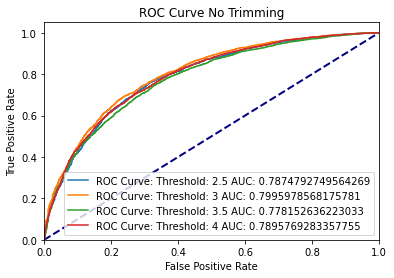

In [36]:
compute_draw_roc_auc_svd(df_ratings_surprise,30, "No Trimming")

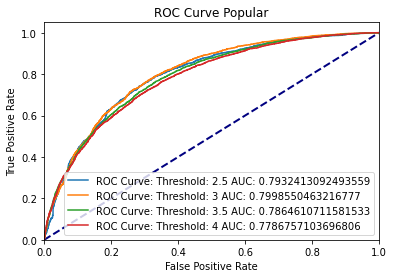

In [37]:
compute_draw_roc_auc_svd(df_ratings_popular_surprise,best_k_popular, "Popular")

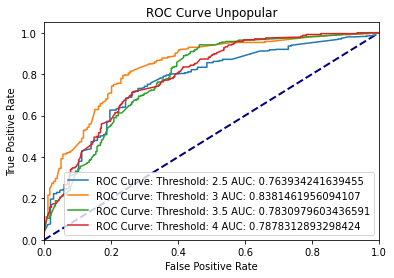

In [38]:
compute_draw_roc_auc_svd(df_ratings_unpopular_surprise,best_k_unpopular, "Unpopular")

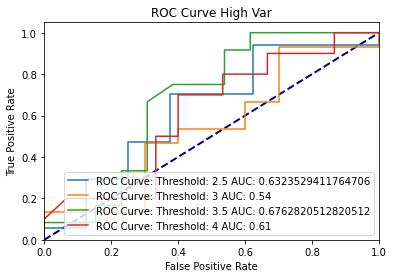

In [39]:
compute_draw_roc_auc_svd(df_ratings_high_var_surprise,best_k_high_var, "High Var")